In [6]:
# 유임승차 승객수가 가장 많은 역과 승객 수 조회
import csv

In [12]:
with open('data/202308_subway.csv', 'r', encoding='utf-8') as file:
    data = csv.reader(file)
    next(data)
    # maxInfo[0] : 유임승차 승객수가 가장 많은 역
    # maxInfo[1] : 유임승차 승객수가 가장 많은 역의 승객수
    maxInfo = ['', 0]
    for row in data:
        row[4] = int(row[4].replace(',', ''))
        if row[4] > maxInfo[1]:
            maxInfo[0] = row[3]
            maxInfo[1] = row[4]
    print(f'유임승차 승객수가 가장 많은 역은 {maxInfo[0]}역이고, 승객 수는 {maxInfo[1]}명 이다.')

유임승차 승객수가 가장 많은 역은 강남역이고, 승객 수는 2135670명 이다.


In [22]:
# 유임승차, 유임하차, 무임승차, 무임하차 승객수가 가장 많은 역과 승객 수 조회
with open('data/202308_subway.csv', 'r', encoding='utf-8') as file:
    data = csv.reader(file)
    next(data)
    stations = [''] *4
    max_persons = [0] *4
#     print(stations, max_persons)
    for row in data:
        for i in range(4):
            person = int(row[4+i].replace(',',''))
            if person > max_persons[i]:
                stations[i] = row[3]
                max_persons[i] = person
    titles = ['유임승차', '유임하차', '무임승차', '무임하차']
    for i in range(len(stations)):
        print(f'{titles[i]} : {stations[i]}({max_persons[i]}명)')

유임승차 : 강남(2135670명)
유임하차 : 홍대입구(2100640명)
무임승차 : 영등포(279986명)
무임하차 : 영등포(280606명)


In [30]:
# 출근시간(오전 7시)에 가장 많이 승객이 승차하는 역을 검색
with open('data/202308_trans_time.csv', 'r', encoding='utf-8') as file:
    data = csv.reader(file)
    next(data)
    next(data)
    
    station = ''
    max_person = 0
    
    for row in data:
        person = int(row[10].replace(',',''))
        if person > max_person:
            station = f'{row[3]}({row[1]})'
            max_person = person
    print(f'{station} : {max_person}명')

신림(2호선) : 186200명


In [57]:
# 출근시간대(오전 7시, 8시, 9시) 승차 ㅅ승객수가 가장 많은 역 조회
def to_int(data):
    return int(data.replace(',', ''))
               
with open('data/202308_trans_time.csv', 'r', encoding='utf-8') as file:
    data = csv.reader(file)
    next(data)
    next(data)
    max_persons = [0]
    station=''
    for row in data:
        persons = row[10:15:2]
        persons = list(map(to_int, persons))
        
        if sum(persons) > sum(max_persons):
            station = f'{row[3]}({row[1]})'
            max_persons = persons
    print(f'{station} : {sum(max_persons)}명')
        
        # persons = [int(p.replace(',',''))for p in row[10:15:2]]
        # print(persons, sum(persons))

신림(2호선) : 613852명


In [58]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x212d624cf10>,
 [Text(0.6372174080319106, 0.8966348057604577, '7시대'),
  Text(-1.089976564800638, -0.14815899630262183, '8시대'),
  Text(0.7521786857356851, -0.8026376671480958, '9시대')],
 [Text(0.3475731316537694, 0.48907353041479507, '30.33%'),
  Text(-0.5945326717094389, -0.08081399798324827, '43.63%'),
  Text(0.4102792831285555, -0.4378023638989613, '26.03%')])

C:\Users\User\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


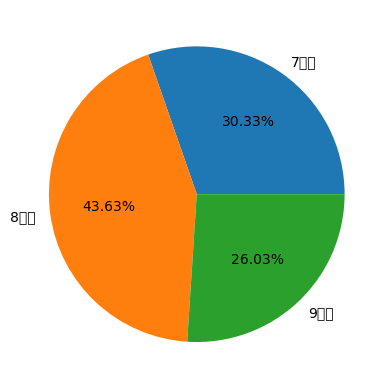

In [59]:
plt.pie(max_persons, labels=['7시대', '8시대', '9시대'], autopct='%.2f%%')